In [1]:
suppressMessages({
    library(SummarizedExperiment)
    library(DESeq2)
    library(tidyverse)
    library(cowplot)
    library(ExploreModelMatrix)
    library(ComplexHeatmap)
    library(clusterProfiler)
    library(org.Hs.eg.db)
})

In [4]:
# use hsa
search_kegg_organism('human', by = 'common_name')

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
1,hsa,Homo sapiens,human
488,phu,Pediculus humanus corporis,human body louse
8078,bhum,Bacteroides humanifaecis,Bacteroides humanifaecis


In [2]:
# load uniquely expressed coding lncRNA genes by globin clear
gc_genes = read.csv("globin_clear_unique_codinglnc.csv")
names(gc_genes)[1] = "ENSEMBL_ID"

In [3]:
# add index
row.names(gc_genes) = 1:nrow(gc_genes)

In [5]:
# there are some duplicates
mapping = select(org.Hs.eg.db, gc_genes$ENSEMBL_ID, "ENTREZID", "ENSEMBL")

'select()' returned 1:many mapping between keys and columns



In [6]:
gc_genes_entrez = mapping[!is.na(mapping$ENTREZID),]
gc_genes_not_mapped = mapping[is.na(mapping$ENTREZID),]
gc_genes_not_mapped = filter(gc_genes, ENSEMBL_ID %in% gc_genes_not_mapped$ENSEMBL)

In [7]:
# check what the unmapped genes are
annotation = read.table("gencode.v46.primary_assembly.gene_annotation.txt", header = TRUE)


In [8]:
annotation["ENSEMBL"] = sub("\\..*", "", annotation$ENS_ID)

In [9]:
gc_genes_not_mapped_table = filter(annotation, ENSEMBL %in% gc_genes_not_mapped$ENSEMBL_ID)

In [10]:
# pct unmapped gc genes
table(gc_genes_not_mapped_table$Gene_Biotype) / table(filter(annotation, ENSEMBL %in% gc_genes$ENSEMBL_ID)$Gene_Biotype)

# according to indra is normal
# https://maayanlab.cloud/Enrichr/


        lncRNA protein_coding 
    0.70595691     0.06821282 

In [133]:
gc_genes_entrez

,ENSEMBL,ENTREZID
,<chr>,<chr>
4,ENSG00000204442,728215
6,ENSG00000174990,763
7,ENSG00000137077,6366
11,ENSG00000249693,100506564
12,ENSG00000164893,157724
13,ENSG00000176495,390195
14,ENSG00000288763,124900931
17,ENSG00000254813,340357
18,ENSG00000203733,100126572


In [11]:
# high p value cutoff since these genes don't appear in other condition
gc_res = enrichKEGG(gene = gc_genes_entrez$ENTREZID, organism = "hsa", pvalueCutoff = Inf)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [148]:
length(gc_genes_entrez$ENTREZID)

[1] 1164

In [12]:
gc_res_df = data.frame(gc_res[order(gc_res$Count, decreasing = TRUE), ])
head(gc_res_df, 10)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04740,Organismal Systems,Sensory system,hsa04740,Olfactory transduction,49/261,453/8848,7.971094e-16,1.905091e-13,1.795594e-13,390195/79501/128966576/79339/346525/390882/390078/119764/392309/441669/346517/393046/219432/79345/81439/81282/138883/26248/392391/26339/390059/390067/343563/401993/26532/282763/390264/390439/392138/219981/219858/403253/8590/390174/341418/127074/403273/391211/390066/26716/119695/81469/26219/120793/120796/390445/390442/441933/442361,49
hsa04080,Environmental Information Processing,Signaling molecules and interaction,hsa04080,Neuroactive ligand-receptor interaction,33/261,368/8848,8.951660e-09,1.069723e-06,1.008240e-06,2743/3814/55879/113091/1137/9568/2691/624/2903/7200/83551/10022/6750/399967/5173/1392/2911/116/2566/5340/9340/114131/117/1909/2561/4886/2904/2488/623/2890/4142/5367/147,33
hsa04024,Environmental Information Processing,Signal transduction,hsa04024,cAMP signaling pathway,15/261,226/8848,2.791752e-03,1.334458e-01,1.257758e-01,9568/114/23439/2903/6750/1392/116/117/1909/4886/2904/2488/2890/5143/64399,15
hsa05033,Human Diseases,Substance dependence,hsa05033,Nicotine addiction,8/261,41/8848,2.113704e-05,1.683917e-03,1.587132e-03,55879/1137/2903/2566/2561/2904/2890/140679,8
hsa04610,Organismal Systems,Immune system,hsa04610,Complement and coagulation cascades,8/261,88/8848,4.315652e-03,1.689791e-01,1.592668e-01,735/624/5104/1361/2244/5340/623/5648,8
hsa04976,Organismal Systems,Digestive system,hsa04976,Bile secretion,8/261,90/8848,4.949177e-03,1.689791e-01,1.592668e-01,6523/114/23439/3781/9971/10941/64240/7364,8
hsa04975,Organismal Systems,Digestive system,hsa04975,Fat digestion and absorption,6/261,43/8848,1.515762e-03,9.056676e-02,8.536132e-02,1208/346606/8513/64240/5322/64600,6


In [13]:
# do same for non gc
non_gc_genes = read.csv("non_globin_clear_unique_codinglnc.csv")
names(non_gc_genes)[1] = "ENSEMBL_ID"
row.names(non_gc_genes) = 1:nrow(non_gc_genes)
mapping = select(org.Hs.eg.db, non_gc_genes$ENSEMBL_ID, "ENTREZID", "ENSEMBL")
non_gc_genes_entrez = mapping[!is.na(mapping$ENTREZID),]
non_gc_res = enrichKEGG(gene = non_gc_genes_entrez$ENTREZID, organism = "hsa", pvalueCutoff = Inf)

'select()' returned 1:many mapping between keys and columns



In [40]:
non_gc_res_df = data.frame(non_gc_res[order(non_gc_res$Count, decreasing = TRUE), ])
head(non_gc_res_df, 10)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04740,Organismal Systems,Sensory system,hsa04740,Olfactory transduction,0.20161290,453/8848,2.593365e-09,4.590256e-07,4.422370e-07,341568/81448/9596/138882/286365/81470/122748/81458/81392/5137/51806/254973/219447/390084/338662/128371/127064/81300/26245/1260/79541/341416/26693/127068/390648,25
hsa04080,Environmental Information Processing,Signaling molecules and interaction,hsa04080,Neuroactive ligand-receptor interaction,0.13709677,368/8848,1.349516e-05,1.194322e-03,1.150640e-03,84539/4986/146/9038/2917/130574/7201/2742/1907/319100/4295/85569/8862/1816/2915/2555/796,17
hsa04020,Environmental Information Processing,Signal transduction,hsa04020,Calcium signaling pathway,0.08064516,254/8848,2.944704e-03,1.042425e-01,1.004299e-01,3270/146/8823/7201/5137/57172/51806/2277/1816/2915,10
hsa04270,Organismal Systems,Circulatory system,hsa04270,Vascular smooth muscle contraction,0.06451613,134/8848,5.664302e-04,2.944529e-02,2.836834e-02,146/2977/30814/1907/51806/84647/255189/796,8
hsa04744,Organismal Systems,Sensory system,hsa04744,Phototransduction,0.03225806,29/8848,6.654302e-04,2.944529e-02,2.836834e-02,2792/2986/6010/51806,4
hsa00592,Metabolism,Lipid metabolism,hsa00592,alpha-Linolenic acid metabolism,0.02419355,26/8848,5.520226e-03,1.628467e-01,1.568906e-01,30814/84647/255189,3


In [185]:
# shared pathways
intersect(row.names(non_gc_res_df), row.names(gc_res_df))

[1] "hsa04740" "hsa04080"

In [190]:
# gc unique pathways
setdiff(row.names(gc_res_df), intersect(row.names(non_gc_res_df), row.names(gc_res_df)))

[1] "hsa04024" "hsa05033" "hsa04610" "hsa04976" "hsa04975"

In [189]:
# non gc unique pathways
setdiff(row.names(non_gc_res_df), intersect(row.names(non_gc_res_df), row.names(gc_res_df)))

[1] "hsa04020" "hsa04270" "hsa04744" "hsa00592"

In [26]:
gene_ids <- data.frame(gc_res)["hsa04740", "geneID"]
split_gene_ids_g <- strsplit(gene_ids, "/")[[1]]
split_gene_ids_g

[1] "390195"    "79501"     "128966576" "79339"     "346525"    "390882"   
 [7] "390078"    "119764"    "392309"    "441669"    "346517"    "393046"   
[13] "219432"    "79345"     "81439"     "81282"     "138883"    "26248"    
[19] "392391"    "26339"     "390059"    "390067"    "343563"    "401993"   
[25] "26532"     "282763"    "390264"    "390439"    "392138"    "219981"   
[31] "219858"    "403253"    "8590"      "390174"    "341418"    "127074"   
[37] "403273"    "391211"    "390066"    "26716"     "119695"    "81469"    
[43] "26219"     "120793"    "120796"    "390445"    "390442"    "441933"   
[49] "442361"

In [27]:
gene_ids <- data.frame(non_gc_res)["hsa04740", "geneID"]
split_gene_ids_n <- strsplit(gene_ids, "/")[[1]]
split_gene_ids_n

[1] "341568" "81448"  "9596"   "138882" "286365" "81470"  "122748" "81458" 
 [9] "81392"  "5137"   "51806"  "254973" "219447" "390084" "338662" "128371"
[17] "127064" "81300"  "26245"  "1260"   "79541"  "341416" "26693"  "127068"
[25] "390648"

In [28]:
setdiff(split_gene_ids_n, split_gene_ids_g)

[1] "341568" "81448"  "9596"   "138882" "286365" "81470"  "122748" "81458" 
 [9] "81392"  "5137"   "51806"  "254973" "219447" "390084" "338662" "128371"
[17] "127064" "81300"  "26245"  "1260"   "79541"  "341416" "26693"  "127068"
[25] "390648"

In [15]:
browseKEGG(non_gc_res, 'hsa04740')
browseKEGG(non_gc_res, 'hsa04080')

In [29]:
browseKEGG(gc_res, 'hsa04740')

In [ ]:
# shared pathways
browseKEGG(non_gc_res, 'hsa04740')
browseKEGG(non_gc_res, 'hsa04080')
browseKEGG(gc_res, 'hsa04740')
browseKEGG(gc_res, 'hsa04080')

# gc unique
browseKEGG(gc_res, 'hsa04024')
browseKEGG(gc_res, 'hsa05033')
browseKEGG(gc_res, 'hsa04610')
browseKEGG(gc_res, 'hsa04976')
browseKEGG(gc_res, 'hsa04975')

# non gc unique
browseKEGG(non_gc_res, 'hsa04020')
browseKEGG(non_gc_res, 'hsa04270')
browseKEGG(non_gc_res, 'hsa04744')
browseKEGG(non_gc_res, 'hsa00592')

Warning message in plot_theme(plot):
"The `axis.lab.y` theme element is not defined in the element hierarchy."


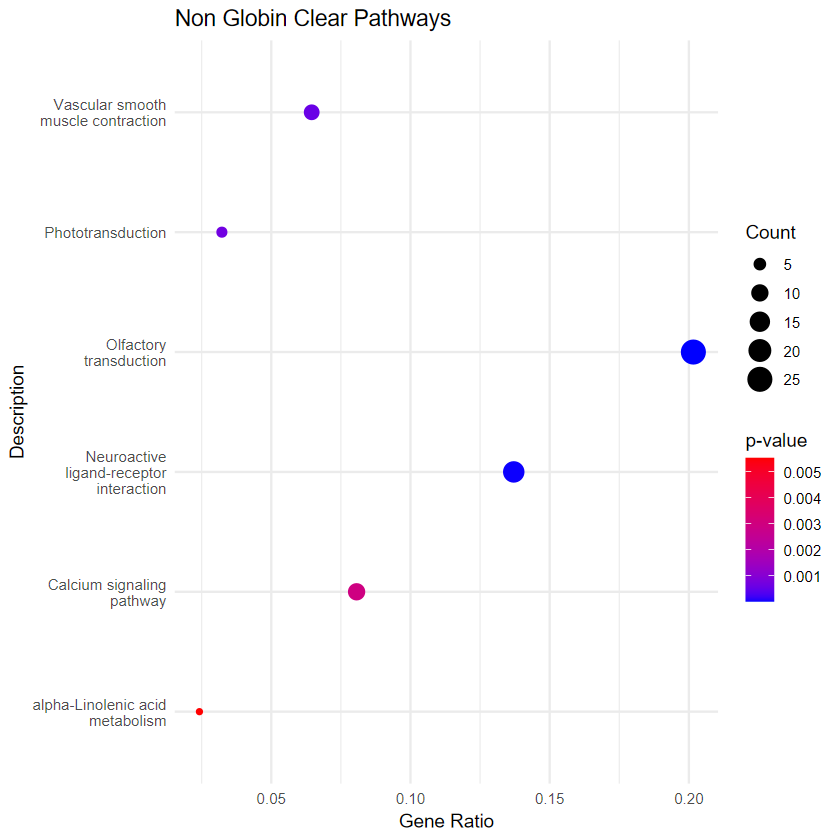

In [58]:
# visualize pathways for non globin clear unique

non_gc_res <- non_gc_res %>%
  arrange(desc(GeneRatio)) %>%
  mutate(Description = factor(Description, levels = unique(Description)))  # Order Description by Count

non_gc_res$Description <- str_wrap(non_gc_res$Description, width = 20)

# Create the dot plot
plot <- ggplot(non_gc_res, aes(x = GeneRatio, y = Description, size = Count, color = pvalue)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  labs(x = "Gene Ratio", y = "Description", size = "Count", color = "p-value", title = "Non Globin Clear Pathways") +
  theme_minimal() + 
  theme(axis.lab.y = element_text(size = 20))

# Save the plot to an image with DPI 300
#ggsave("dot_plot.png", plot = plot, dpi = 300)
plot

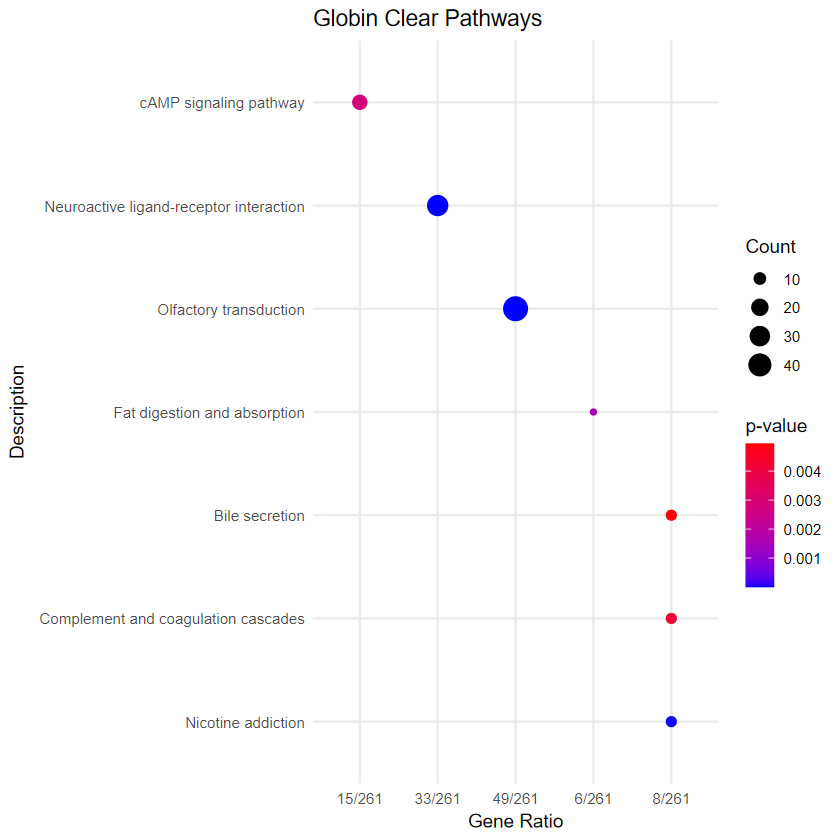

In [50]:
# visualize pathways for globin clear unique

gc_res = data.frame(gc_res)
gc_res <- gc_res %>%
  arrange(desc(GeneRatio)) %>%
  mutate(Description = factor(Description, levels = unique(Description)))  # Order Description by Count

# Create the dot plot
plot <- ggplot(gc_res, aes(x = GeneRatio, y = Description, size = Count, color = pvalue)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  labs(x = "Gene Ratio", y = "Description", size = "Count", color = "p-value", title = "Globin Clear Pathways") +
  theme_minimal()

# Save the plot to an image with DPI 300
#ggsave("dot_plot.png", plot = plot, dpi = 300)
plot

In [60]:
# Now DEGs from differential expression
#
res = data.frame(readRDS("comp_res_common_codinglnc.RDS"))

In [61]:
# drop all genes with baseMean = 0
res = filter(res, baseMean != 0)

# drop all genes with NA fdr pvalue and get only significant
res = filter(res, !is.na(padj) & padj < 0.05)

res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000239906,18.481653,-0.9004896,0.32682137,-2.755296,5.863906e-03,3.601407e-02
ENSG00000241860,136.745029,-1.0686863,0.23563841,-4.535280,5.752702e-06,1.277521e-04
ENSG00000290385,365.735217,-0.9523347,0.19818087,-4.805382,1.544566e-06,4.029591e-05
ENSG00000291215,238.248620,-0.9098605,0.13854862,-6.567085,5.130984e-11,5.162167e-09
AGRN,143.355867,-0.7100456,0.25799335,-2.752186,5.919893e-03,3.629672e-02
SSU72,1585.892299,0.3075839,0.07678814,4.005618,6.185559e-05,9.402256e-04
CDK11B,863.436379,-0.6133762,0.11284740,-5.435448,5.465888e-08,2.113244e-06
SLC35E2B,1489.552531,-0.2854068,0.09026364,-3.161925,1.567301e-03,1.308599e-02
ENSG00000293187,39.076718,-0.7257351,0.19521985,-3.717527,2.011824e-04,2.487122e-03


In [62]:
# read in symbols file
grch_symbols = read.csv("symbols.csv", row.names = 1)

res$ENSEMBL_ID = row.names(grch_symbols)[match(row.names(res), grch_symbols$symbol)]

In [63]:
# globin TRUE / globin FALSE (positive LFC indicates higher expression in GLOBIN Depleted)
res_up = filter(res, log2FoldChange > 0)
res_down = filter(res, log2FoldChange < 0)

In [64]:
# upregulated DEGs
mapping = select(org.Hs.eg.db, res_up$ENSEMBL_ID, "ENTREZID", "ENSEMBL")
deg_genes_entrez = mapping[!is.na(mapping$ENTREZID),]
deg_res_up = enrichKEGG(gene = deg_genes_entrez$ENTREZID, organism = "hsa", pvalueCutoff = Inf)

deg_res_up = data.frame(deg_res_up)

deg_up_pathways = arrange(filter(deg_res_up, p.adjust < 0.05),  desc(Count))

'select()' returned 1:many mapping between keys and columns



In [65]:
# downregulated DEGs
mapping = select(org.Hs.eg.db, res_down$ENSEMBL_ID, "ENTREZID", "ENSEMBL")
deg_genes_entrez = mapping[!is.na(mapping$ENTREZID),]
deg_res_down = enrichKEGG(gene = deg_genes_entrez$ENTREZID, organism = "hsa", pvalueCutoff = Inf)

deg_res_down = data.frame(deg_res_down)

deg_down_pathways = arrange(filter(deg_res_down, p.adjust < 0.05), desc(Count))

'select()' returned 1:many mapping between keys and columns



In [66]:
# No shared pathways!
shared_pathways = intersect(row.names(deg_up_pathways), row.names(deg_down_pathways))
shared_pathways

character(0)

In [67]:
data.frame(table(deg_up_pathways$subcategory))

Var1,Freq
<fct>,<int>
Amino acid metabolism,1
Cancer: overview,1
Carbohydrate metabolism,1
Cardiovascular disease,1
Circulatory system,1
Endocrine and metabolic disease,2
Energy metabolism,1
Environmental adaptation,1
"Folding, sorting and degradation",3


In [68]:
data.frame(table(deg_down_pathways$subcategory))

Var1,Freq
<fct>,<int>
Aging,2
Amino acid metabolism,1
Cancer: overview,2
Cell motility,2
Cellular community - eukaryotes,1
Chromosome,2
Development and regeneration,1
Drug resistance: antineoplastic,1
Endocrine and metabolic disease,2


In [70]:
deg_up_pathways

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa03010,Genetic Information Processing,Translation,hsa03010,Ribosome,89/731,172/8848,1.503441e-51,4.690735e-49,3.940597e-49,6135/64960/6202/6125/54460/65005/6232/79590/6201/9553/6233/6160/6168/6161/6138/3921/9045/6159/6152/11222/200916/6165/6133/65008/51023/6164/6189/6167/6228/6208/29093/6222/6204/4736/64928/6206/29074/64983/29088/6224/6129/6156/28998/6194/11224/6136/6130/6229/6157/6207/54948/2197/65003/219927/6188/6230/6231/6171/6128/6175/6144/6166/51187/51065/6124/6210/6154/9349/6143/6155/51264/6169/51081/25873/6234/64981/7311/6217/6223/6141/23521/6205/6203/6193/6227/64968/6191/6170/6134,89
hsa05014,Human Diseases,Neurodegenerative disease,hsa05014,Amyotrophic lateral sclerosis,76/731,371/8848,3.449519e-14,1.195833e-12,1.004597e-12,6390/5690/4725/7388/2882/515/6391/6432/9167/1329/10213/518/4709/4705/4710/5217/4717/4724/1350/27089/7416/4695/1616/6428/1347/5689/4697/5701/7381/1345/4715/4712/11258/3309/509/29982/90550/5719/5682/4722/10482/834/6392/7846/1649/55967/79023/55860/4707/9377/5685/7385/4706/1327/81631/5216/5691/10476/498/10975/7386/5714/29107/8480/514/5688/6647/539/637/29796/468/4700/54539/1349/4694/4513,76
hsa05022,Human Diseases,Neurodegenerative disease,hsa05022,Pathways of neurodegeneration - multiple diseases,76/731,483/8848,1.888059e-08,4.531341e-07,3.806694e-07,6390/5690/4725/7388/2882/515/6391/9167/6233/1329/3553/10213/518/4709/841/4705/4710/4717/4724/1350/27089/7416/4695/1616/1347/5689/4697/5701/7419/7381/1345/4715/4712/11258/3309/509/29982/90550/7417/5719/5682/4722/6392/7846/1649/55967/7316/55860/4707/9377/5685/7385/4706/1327/81631/5691/10476/498/10975/7311/7386/5714/514/5688/6647/539/637/29796/468/4700/54539/3028/1349/292/4694/4513,76
hsa05171,Human Diseases,Infectious disease: viral,hsa05171,Coronavirus disease - COVID-19,74/731,238/8848,4.341187e-25,6.772251e-23,5.689239e-23,6135/6202/6125/6232/6201/6233/6160/3553/6168/6161/6138/3921/9045/6159/6152/200916/6165/6133/3627/6164/6189/6167/6228/6208/6222/6204/4736/6206/6224/6129/6156/6194/11224/6136/6130/6229/6157/6207/2197/6188/834/6230/719/6231/6171/6128/4938/6175/6144/4792/6166/51187/51065/6124/6210/6154/9349/6143/6155/6169/25873/6234/7311/6217/6223/6141/23521/6205/6203/6193/6227/6191/6170/6134,74
hsa05016,Human Diseases,Neurodegenerative disease,hsa05016,Huntington disease,73/731,311/8848,5.624761e-17,2.924876e-15,2.457133e-15,6390/5690/4725/7388/2882/515/6391/9167/1329/10213/518/4709/841/4705/4710/5437/4717/4724/1350/27089/7416/4695/1347/9519/5689/6908/4697/5701/7419/7381/1345/5440/4715/4712/11258/1211/509/29982/7417/5719/5441/5682/4722/5436/6392/7846/55967/55860/4707/9377/5685/7385/4706/5432/1327/5691/10476/498/10975/7386/5714/514/5688/6647/539/29796/5435/4700/54539/1349/292/4694/4513,73
hsa05020,Human Diseases,Neurodegenerative disease,hsa05020,Prion disease,70/731,278/8848,4.607113e-18,2.874838e-16,2.415097e-16,6390/5690/4725/7388/515/6391/4688/9167/1329/3553/10213/518/4709/4705/4710/4717/4724/1350/27089/7416/4695/1347/2534/5689/4697/653361/5701/7419/7381/1345/4715/4712/3309/509/90550/7417/5719/5682/4722/10963/6392/3312/7846/1649/55967/4707/9377/5685/7385/4706/1327/5691/10476/498/10975/7386/5714/514/5688/6647/539/29796/4689/468/4700/54539/1349/292/4694/4513,70
hsa05012,Human Diseases,Neurodegenerative disease,hsa05012,Parkinson disease,69/731,271/8848,4.262100e-18,2.874838e-16,2.415097e-16,6390/5690/4725/7388/515/6391/9167/6233/1329/10213/518/4709/4705/4710/4717/4724/1350/27089/7416/4695/1843/1616/1347/5689/4697/5701/7419/7381/1345/4715/4712/7295/3309/509/90550/7417/5719/5682/4722/6392/7846/1649/55967/7316/4707/9377/5685/7385/4706/1327/5691/10476/498/10975/7311/7386/5714/514/5688/6647/539/29796/468/4700/54539/1349/292/4694/4513,69
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,68/731,391/8848,1.766667e-09,4.593334e-08,3.858773e-08,6390/5690/4725/7388/515/6391/9167/132

In [69]:
deg_down_pathways

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05131,Human Diseases,Infectious disease: bacterial,hsa05131,Shigellosis,40/724,249/8848,2.459488e-05,0.002101856,0.001689023,2475/10163/9181/10097/3099/3708/5295/1729/5601/3710/1432/2309/10392/25851/7094/23048/3688/3098/7414/1147/3611/960/2017/3709/5829/207/83660/8678/57521/6093/10892/596/81/598/5335/7335/7307/102724594/257397/4303,40
hsa04144,Cellular Processes,Transport and catabolism,hsa04144,Endocytosis,36/724,252/8848,6.621525e-04,0.013118896,0.010542164,9829/8853/30845/10097/3800/9922/5868/1234/6643/3482/23362/80223/50807/3799/729092/8729/22841/116985/408/867/8411/9815/11021/29082/5371/3480/22905/84440/163/147179/23327/9525/160/10564/30011/23096,36
hsa05205,Human Diseases,Cancer: overview,hsa05205,Proteoglycans in cancer,34/724,204/8848,4.641323e-05,0.002101856,0.001689023,2475/3339/6548/6654/3708/3693/2549/5295/3710/1432/2099/7430/8321/286/5727/7410/3688/27250/960/2017/867/23365/3709/5781/5829/207/7057/3480/3690/5578/6093/5335/7074/2316,34
hsa04810,Cellular Processes,Cell motility,hsa04810,Regulation of actin cytoskeleton,34/724,230/8848,4.969285e-04,0.011251881,0.009041857,6548/10163/6654/10097/200576/4638/3693/5295/324/1729/7430/2768/7410/3688/7414/1132/23365/3071/54434/5829/207/4629/3684/4628/85464/8396/3674/3690/6093/10297/81/2909/7074/4627,34
hsa04820,NA,NA,hsa04820,Cytoskeleton in muscle cells,34/724,232/8848,5.830354e-04,0.012321482,0.009901374,375790/3339/476/84033/4811/6711/7273/1293/3693/1462/4001/2201/1729/23345/5339/7094/7111/6709/3688/7414/91010/23224/161176/7057/51332/825/83660/4629/4628/4621/3674/3690/84823/4627,34
hsa04510,Cellular Processes,Cellular community - eukaryotes,hsa04510,Focal adhesion,32/724,203/8848,2.250992e-04,0.006486950,0.005212824,3915/6654/1293/2317/4638/3693/5295/1729/5601/7148/7094/2889/7410/3688/7414/3611/7450/5829/394/207/7057/83660/3480/3674/3690/1101/5578/6093/596/81/2909/2316,32
hsa05163,Human Diseases,Infectious disease: viral,hsa05163,Human cytomegalovirus infection,31/724,226/8848,2.920645e-03,0.037033775,0.029759832,2475/3716/3570/9826/109/6654/3708/1234/5530/5295/6892/3710/1432/2768/7248/1147/23365/3709/5829/207/11214/7249/115/113/2775/4775/3690/5578/5608/6093/4773,31
hsa04140,Cellular Processes,Transport and catabolism,hsa04140,Autophagy - animal,30/724,169/8848,3.856824e-05,0.002101856,0.001689023,2475/57448/8837/79065/3667/3708/9711/23001/5295/5515/5601/7248/10133/55626/7405/8408/8660/53349/207/3480/7249/140775/8678/9842/9110/2081/57521/57724/596/598,30
hsa04360,Organismal Systems,Development and regeneration,hsa04360,Axon guidance,30/724,184/8848,1.918112e-04,0.006250520,0.005022832,23380/5362/151449/8440/659/5361/5530/5295/22885/90249/91584/10507/5727/25/3688/8829/3611/23365/10154/54434/5781/4775/85464/5578/6093/5335/4773/23654/5365/55558,30


RETRY WITH GO

In [71]:
library(goseq)

ERROR: Error in library(goseq): there is no package called 'goseq'
